data collision

In [60]:
import os
import time
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import seaborn as sns
# %matplotlib inline

In [ ]:
np.random.seed(0)

In [77]:
log_dir = "./log/latent"
pkls = os.listdir(log_dir)
pkls

['pretrain-rmotion-test_simple_decoder-218.pkl',
 'train-train-tree-257.pkl',
 'train-train-test_simple_decoder-36.pkl',
 'pretrain-rmotion-tree-239.pkl']

## recon (motion)
```	[num_node, data_set[0].x, data.x, output, z]```
num_node, structure info, motion info (joint state), recon motion info, latent z


### fn

In [86]:
def plot_tsne(X,y):
    feat_cols = [ 'dim'+str(i) for i in range(X.shape[1]) ]

    df = pd.DataFrame(X,columns=feat_cols)
    df['y'] = y
    df['label'] = df['y'].apply(lambda i: str(i))
    X, y = None, None
    print('Size of the dataframe: {}'.format(df.shape))

    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(df[feat_cols].values)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    df['tsne-2d-one'] = tsne_results[:,0]
    df['tsne-2d-two'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls", 6),
        data=df,
        legend="full",
        alpha=0.3
    )

### gt

In [87]:
print("dict_keys(['epoch', 'train_latent', 'val_latent'])")

dict_keys(['epoch', 'train_latent', 'val_latent'])


In [88]:
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,pkls[0]), "rb"))

rm_gt_pkl_0 = rm_gt_pkl[0]
data = rm_gt_pkl_0['val_latent']

In [89]:
del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-1].numpy() for dd in data])

Size of the dataframe: (720, 10)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 720 samples in 0.001s...
[t-SNE] Computed neighbors for 720 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 720 / 720
[t-SNE] Mean sigma: 0.912000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.699921
[t-SNE] KL divergence after 300 iterations: 0.354236
t-SNE done! Time elapsed: 0.8375818729400635 seconds


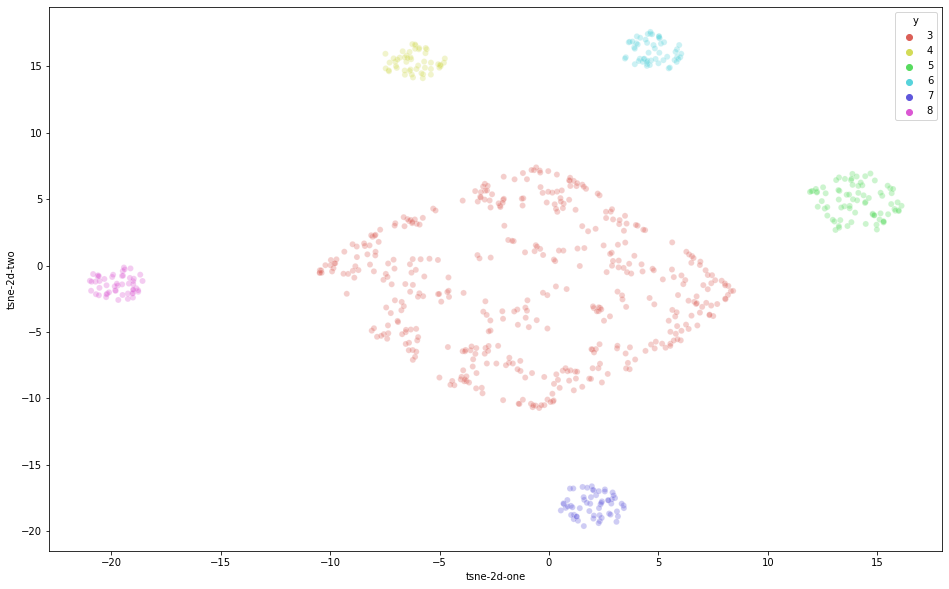

In [90]:
plot_tsne(X, y)

In [91]:
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,pkls[0]), "rb"))

rm_gt_pkl_0 = rm_gt_pkl[0]
data = rm_gt_pkl_0['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-1].numpy() for dd in data])

Size of the dataframe: (720, 10)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 720 samples in 0.001s...
[t-SNE] Computed neighbors for 720 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 720 / 720
[t-SNE] Mean sigma: 0.912000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.482922
[t-SNE] KL divergence after 300 iterations: 0.358277
t-SNE done! Time elapsed: 0.7227718830108643 seconds


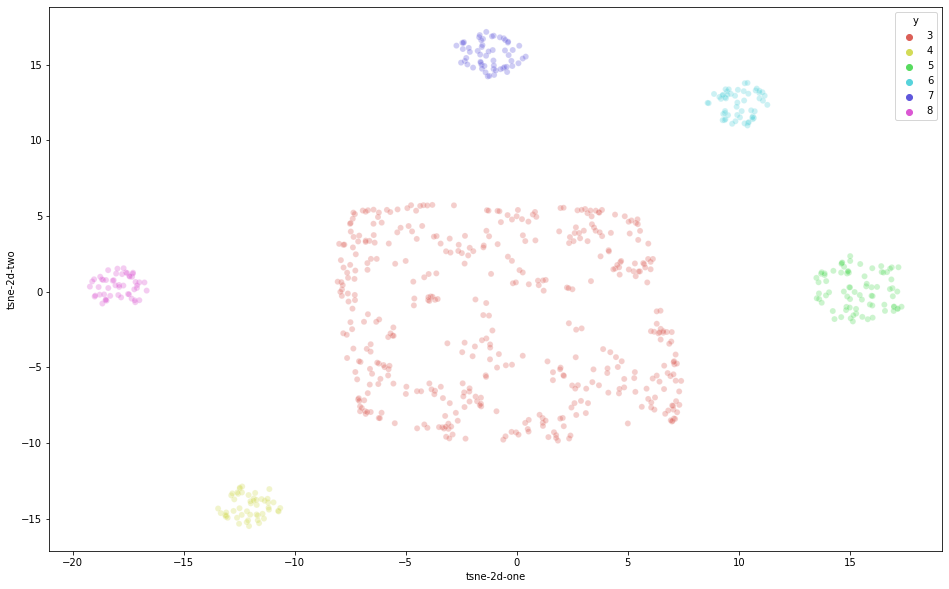

In [92]:
plot_tsne(X, y)

### ours

idx = 0
data = rm_gt_pkl[idx]['val_latent']

Size of the dataframe: (720, 10)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 720 samples in 0.001s...
[t-SNE] Computed neighbors for 720 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 720 / 720
[t-SNE] Mean sigma: 0.000294
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.826389
[t-SNE] KL divergence after 300 iterations: 0.224622
t-SNE done! Time elapsed: 0.6725149154663086 seconds


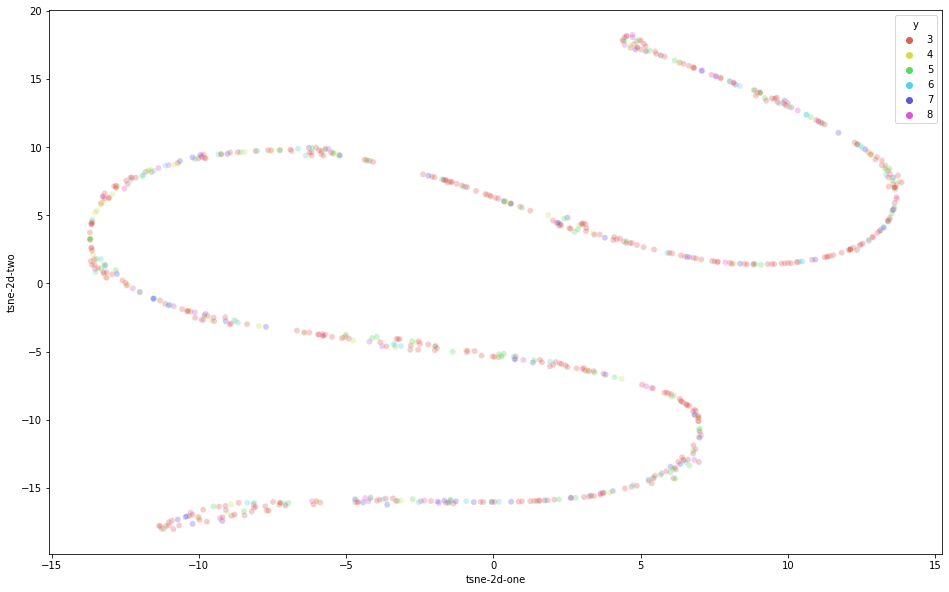

In [95]:
idx = 0
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'pretrain-rmotion-tree-239.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-1].numpy() for dd in data])

plot_tsne(X, y)

Size of the dataframe: (720, 10)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 720 samples in 0.001s...
[t-SNE] Computed neighbors for 720 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 720 / 720
[t-SNE] Mean sigma: 0.000062
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.656178
[t-SNE] KL divergence after 300 iterations: 0.227876
t-SNE done! Time elapsed: 0.693690299987793 seconds


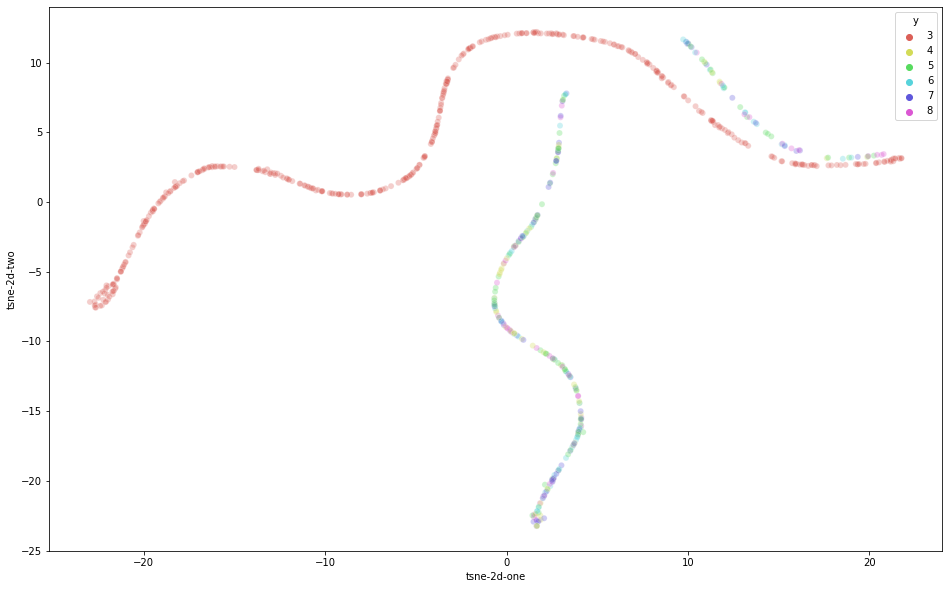

In [96]:
idx = -1
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'pretrain-rmotion-tree-239.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-1].numpy() for dd in data])

plot_tsne(X, y)

## recon (struc)

### gt

Size of the dataframe: (1200, 18)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.000s...
[t-SNE] Computed neighbors for 1200 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 0.083439
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.276566
[t-SNE] KL divergence after 300 iterations: 0.824392
t-SNE done! Time elapsed: 1.8551809787750244 seconds


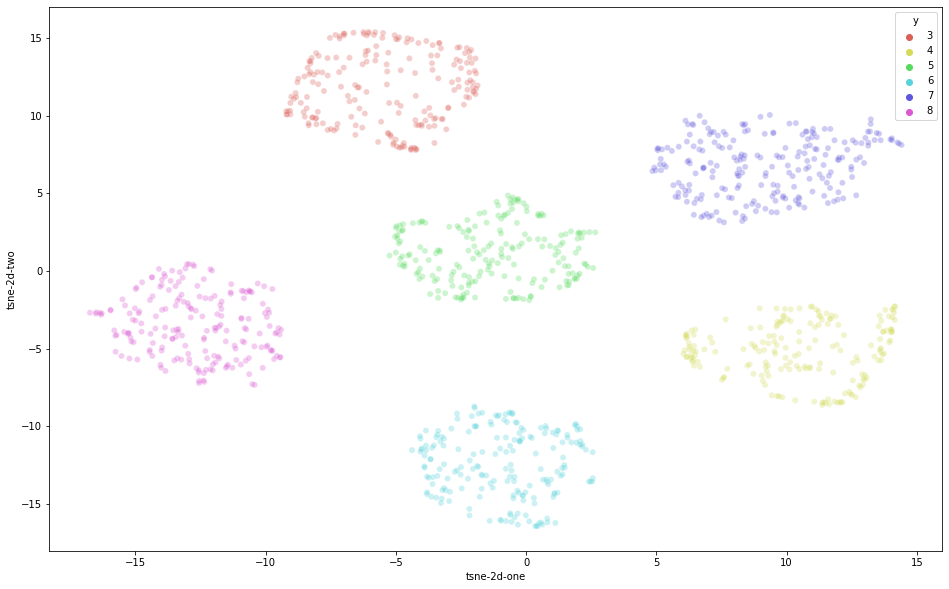

In [106]:
idx = 0
rs_gt_pkl = pickle.load(open(os.path.join(log_dir,'pretrain-rstruc-test_simple_decoder-629.pkl'), "rb"))
data = rs_gt_pkl[idx]['val_latent']

del rs_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-1].numpy() for dd in data])

plot_tsne(X, y)

Size of the dataframe: (1200, 18)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.000s...
[t-SNE] Computed neighbors for 1200 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 0.083439
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.291206
[t-SNE] KL divergence after 300 iterations: 0.832197
t-SNE done! Time elapsed: 1.9325811862945557 seconds


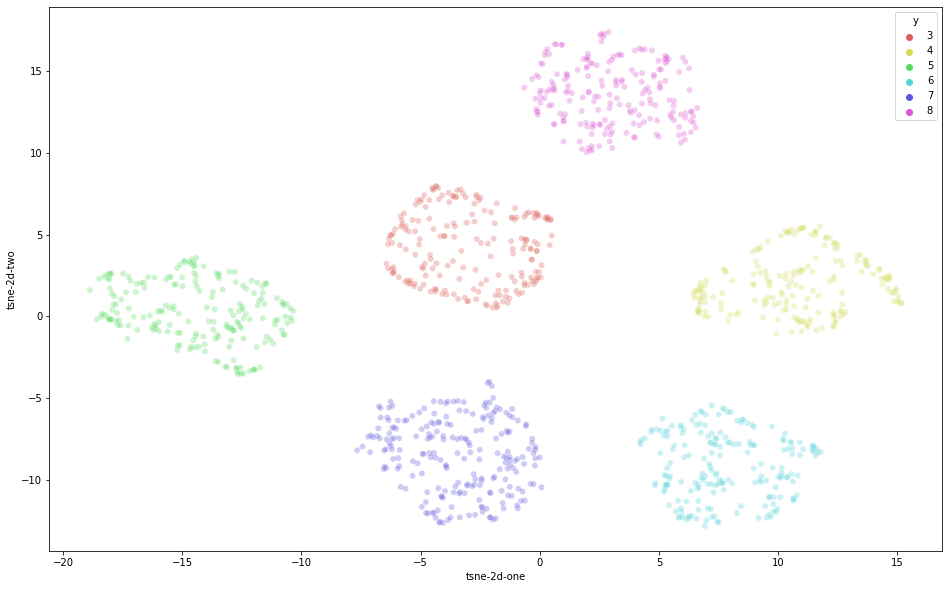

In [107]:
idx = -1
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'pretrain-rstruc-test_simple_decoder-629.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-1].numpy() for dd in data])

plot_tsne(X, y)

### ours

idx = 0
data = rm_gt_pkl[idx]['val_latent']

Size of the dataframe: (1200, 10)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.008s...
[t-SNE] Computed neighbors for 1200 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.391357
[t-SNE] KL divergence after 300 iterations: 0.292403
t-SNE done! Time elapsed: 1.2421581745147705 seconds


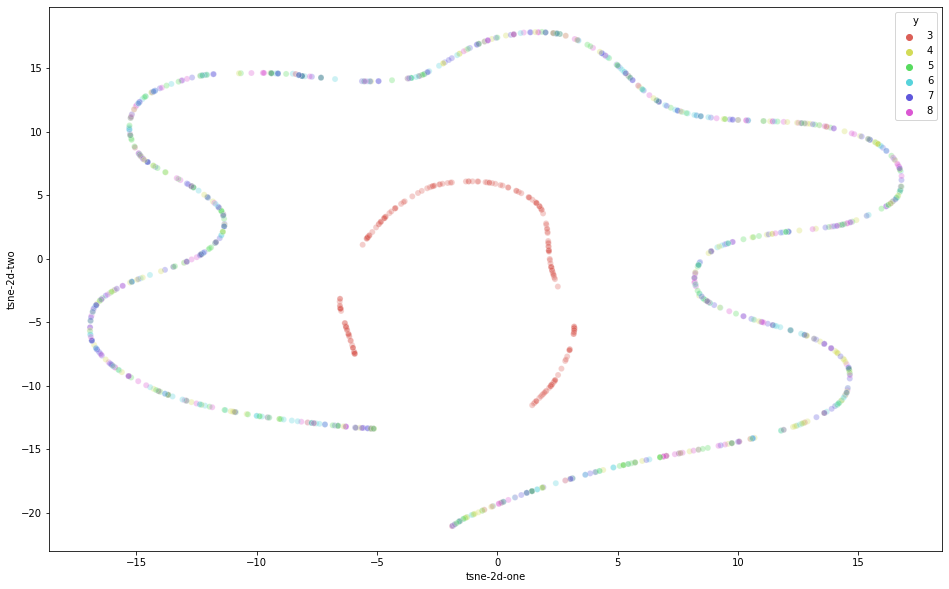

In [108]:
idx = 0
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'pretrain-rstruc-tree-659.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-1].numpy() for dd in data])

plot_tsne(X, y)

Size of the dataframe: (1200, 10)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.001s...
[t-SNE] Computed neighbors for 1200 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.008923
[t-SNE] KL divergence after 300 iterations: 0.229898
t-SNE done! Time elapsed: 1.0865941047668457 seconds


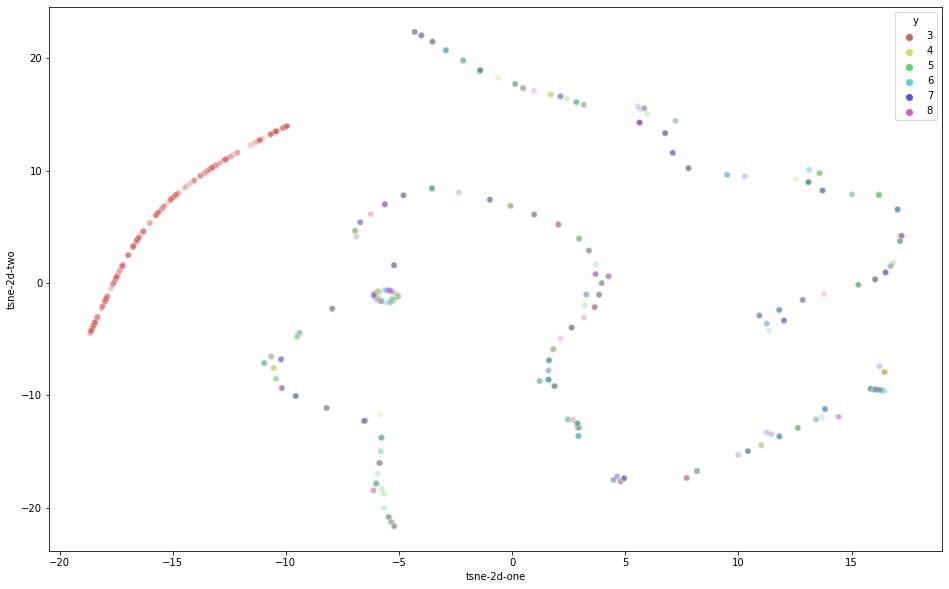

In [110]:
idx = -1
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'pretrain-rstruc-tree-659.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-1].numpy() for dd in data])

plot_tsne(X, y)

## mtl
```	[num_node, d_struc.x, d_motion.s, d_motion.p, d_motion.s, out_f, out_i, z_struc, z_motion]```

### gt

#### struc

Size of the dataframe: (720, 18)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 720 samples in 0.000s...
[t-SNE] Computed neighbors for 720 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 720 / 720
[t-SNE] Mean sigma: 0.007074
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.044254
[t-SNE] KL divergence after 300 iterations: 0.203316
t-SNE done! Time elapsed: 0.706852912902832 seconds


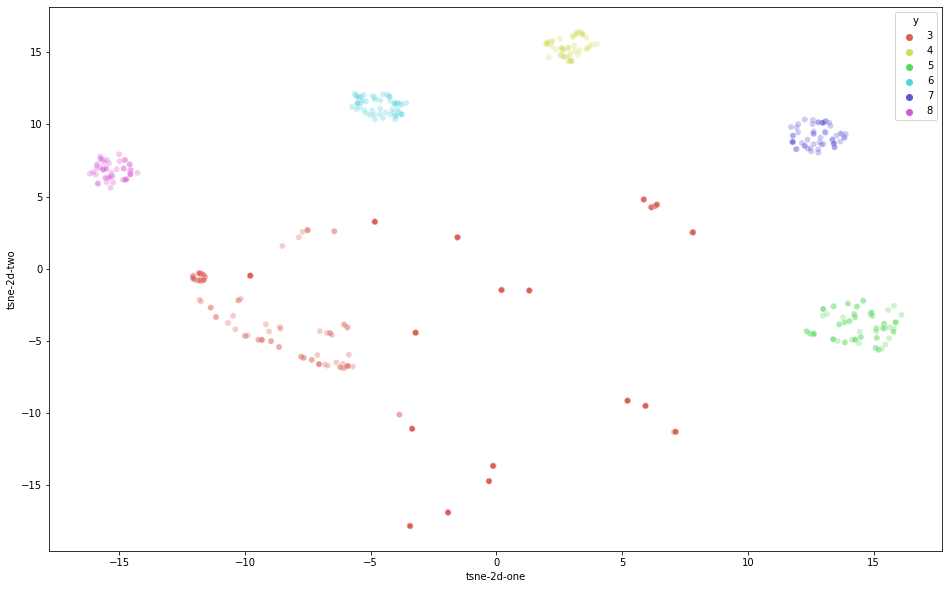

In [97]:
idx = 0
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'train-train-test_simple_decoder-36.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-2].numpy() for dd in data])

plot_tsne(X, y)

Size of the dataframe: (720, 18)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 720 samples in 0.000s...
[t-SNE] Computed neighbors for 720 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 720 / 720
[t-SNE] Mean sigma: 0.007074
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.318054
[t-SNE] KL divergence after 300 iterations: 0.205505
t-SNE done! Time elapsed: 0.8650259971618652 seconds


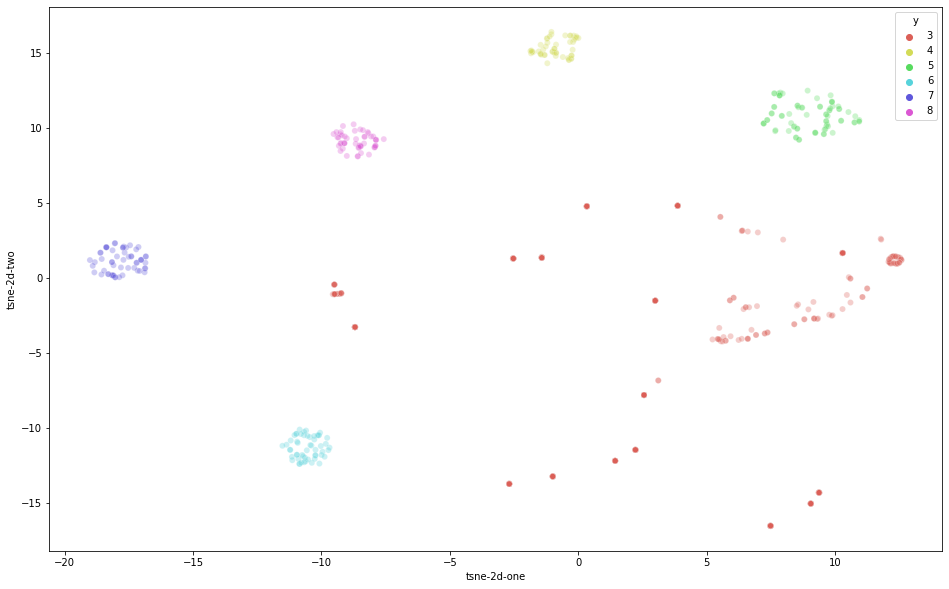

In [98]:
idx = -1
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'train-train-test_simple_decoder-36.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-2].numpy() for dd in data])

plot_tsne(X, y)

#### motion

Size of the dataframe: (720, 10)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 720 samples in 0.000s...
[t-SNE] Computed neighbors for 720 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 720 / 720
[t-SNE] Mean sigma: 0.912001
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.780827
[t-SNE] KL divergence after 300 iterations: 0.352937
t-SNE done! Time elapsed: 0.7060568332672119 seconds


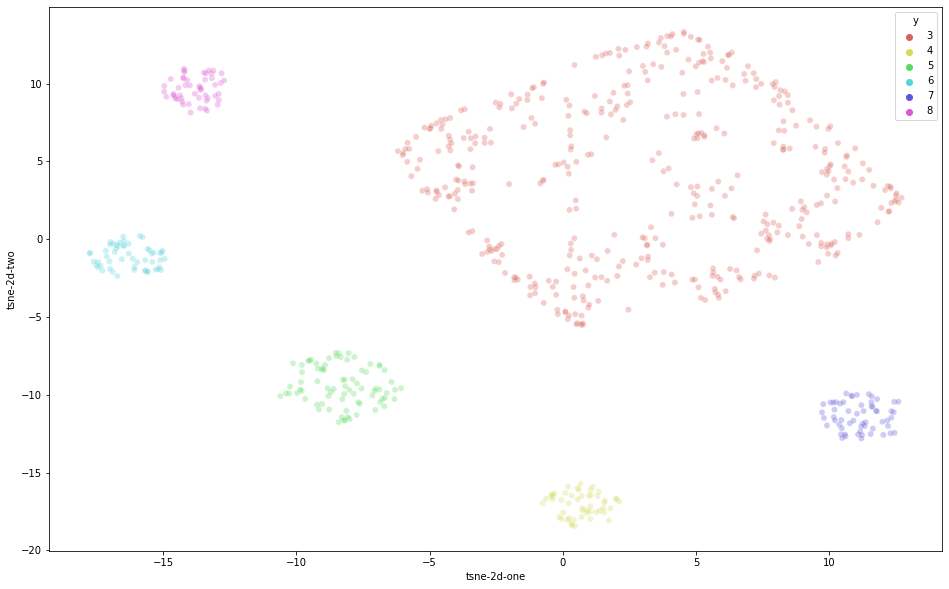

In [99]:
idx = 0
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'train-train-test_simple_decoder-36.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-1].numpy() for dd in data])

plot_tsne(X, y)

Size of the dataframe: (720, 10)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 720 samples in 0.001s...
[t-SNE] Computed neighbors for 720 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 720 / 720
[t-SNE] Mean sigma: 0.912001
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.864555
[t-SNE] KL divergence after 300 iterations: 0.375022
t-SNE done! Time elapsed: 0.6718487739562988 seconds


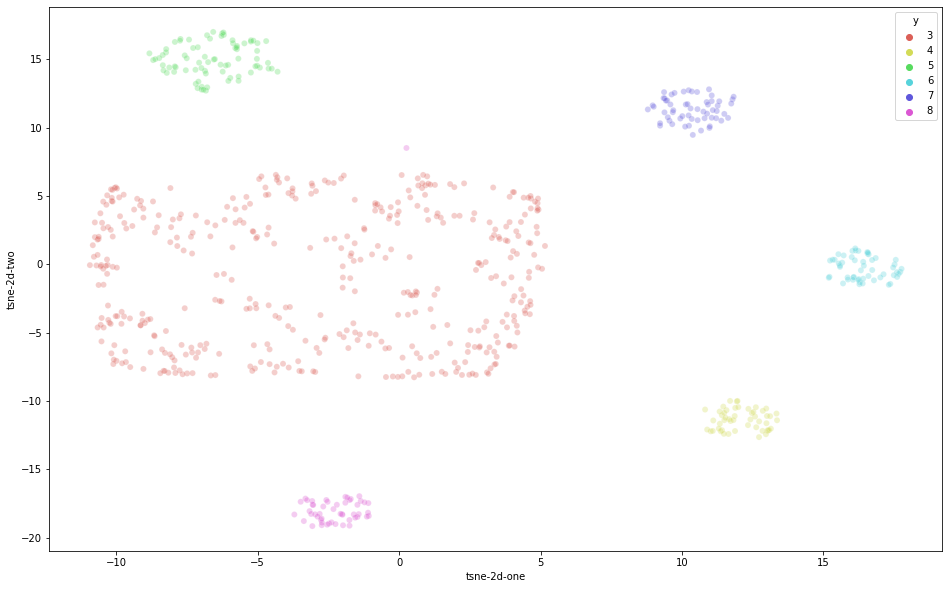

In [100]:
idx = -1
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'train-train-test_simple_decoder-36.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-1].numpy() for dd in data])

plot_tsne(X, y)

### ours

#### struc

Size of the dataframe: (720, 10)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 720 samples in 0.001s...
[t-SNE] Computed neighbors for 720 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 720 / 720
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.149124
[t-SNE] KL divergence after 300 iterations: 0.159568
t-SNE done! Time elapsed: 0.7454028129577637 seconds


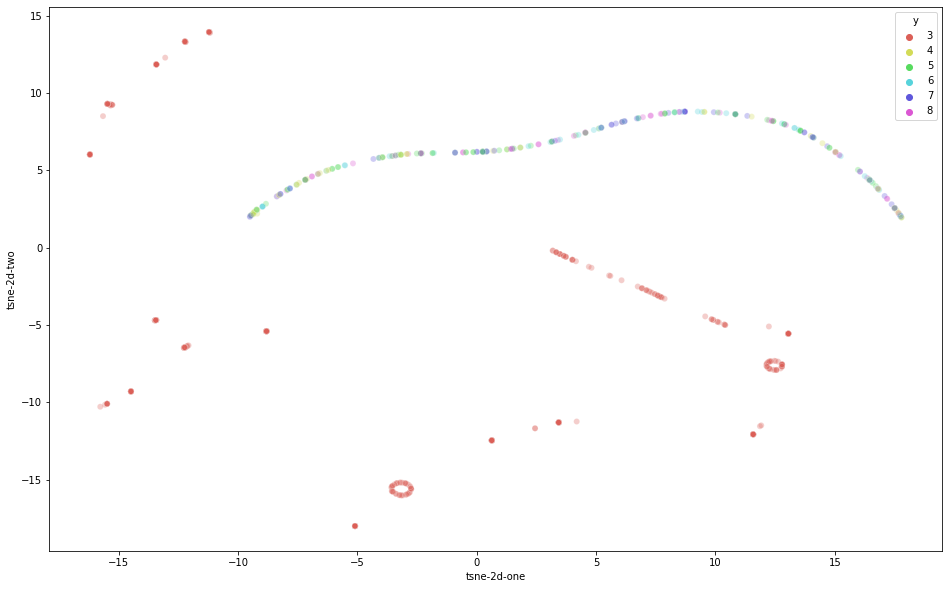

In [101]:
idx = 0
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'train-train-tree-257.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-2].numpy() for dd in data])

plot_tsne(X, y)

Size of the dataframe: (720, 10)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 720 samples in 0.001s...
[t-SNE] Computed neighbors for 720 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 720 / 720
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.312820
[t-SNE] KL divergence after 300 iterations: 0.155642
t-SNE done! Time elapsed: 0.7438971996307373 seconds


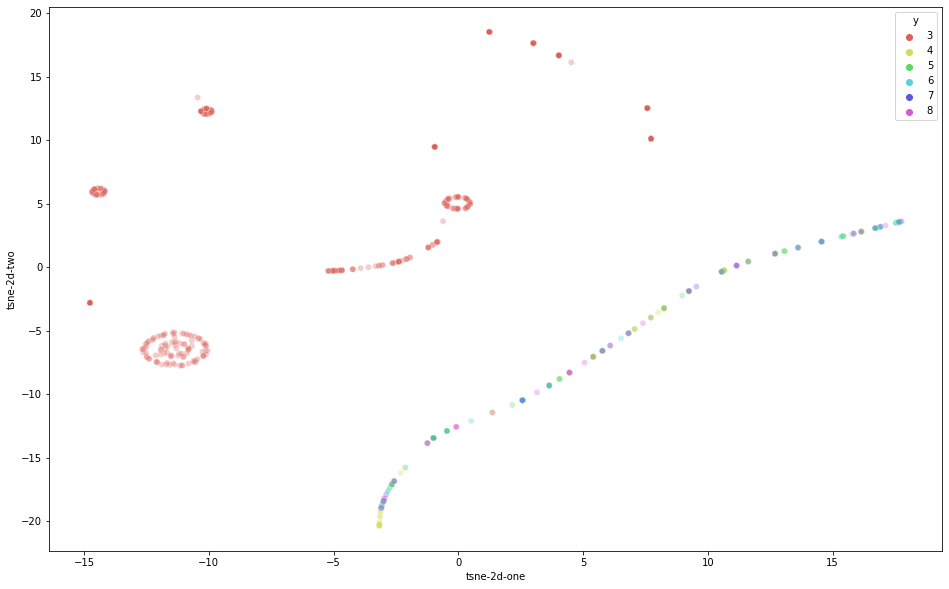

In [102]:
idx = -1
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'train-train-tree-257.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-2].numpy() for dd in data])

plot_tsne(X, y)

#### motion

Size of the dataframe: (720, 10)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 720 samples in 0.001s...
[t-SNE] Computed neighbors for 720 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 720 / 720
[t-SNE] Mean sigma: 0.000062
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.105820
[t-SNE] KL divergence after 300 iterations: 0.231721
t-SNE done! Time elapsed: 0.690007209777832 seconds


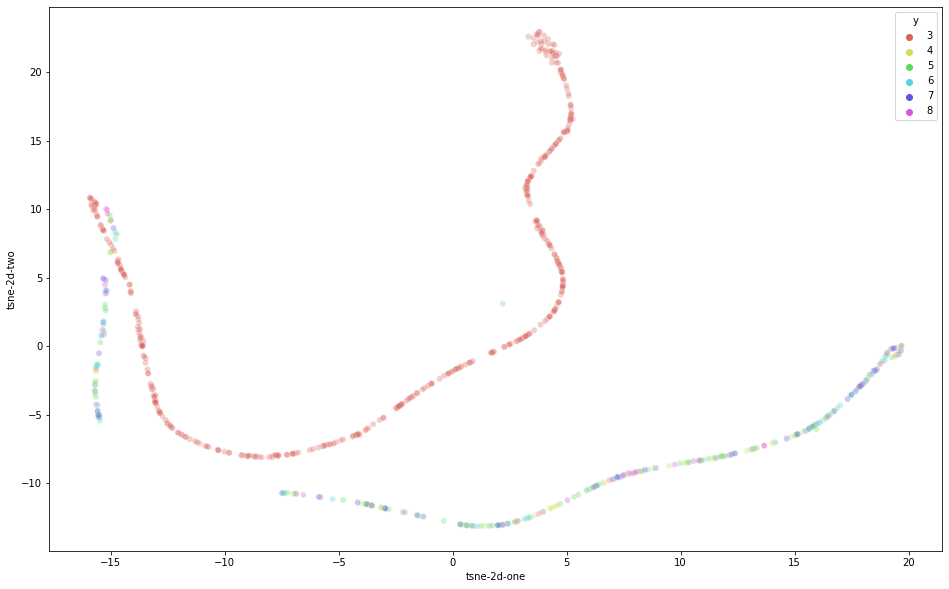

In [103]:
idx = 0
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'train-train-tree-257.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-1].numpy() for dd in data])

plot_tsne(X, y)

Size of the dataframe: (720, 10)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 720 samples in 0.001s...
[t-SNE] Computed neighbors for 720 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 720 / 720
[t-SNE] Mean sigma: 0.000429
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.089375
[t-SNE] KL divergence after 300 iterations: 0.216909
t-SNE done! Time elapsed: 0.653778076171875 seconds


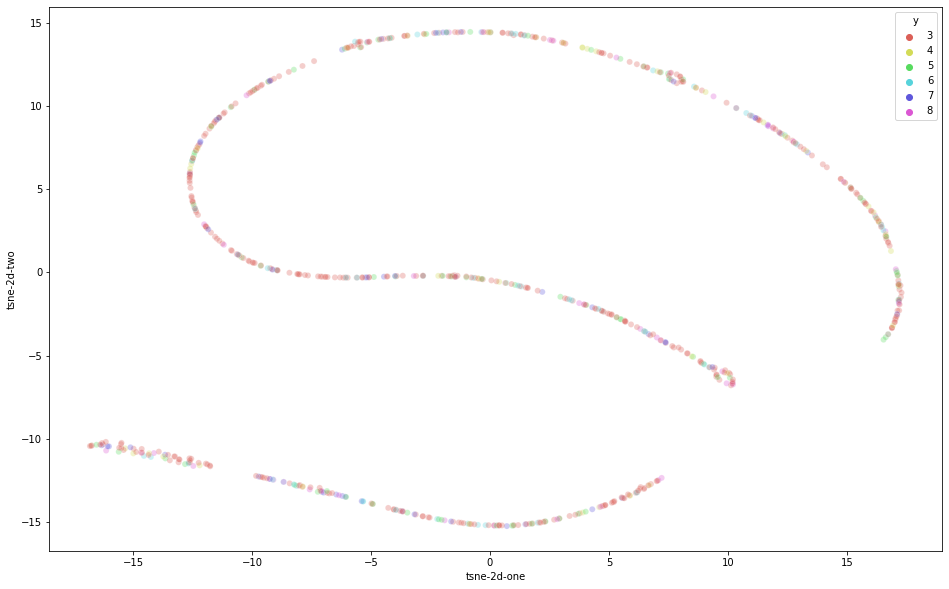

In [104]:
idx = -1
rm_gt_pkl = pickle.load(open(os.path.join(log_dir,'train-train-tree-257.pkl'), "rb"))
data = rm_gt_pkl[idx]['val_latent']

del rm_gt_pkl
y = np.array([dd[0].numpy() for dd in data])
X = np.array([dd[-1].numpy() for dd in data])

plot_tsne(X, y)